In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
os.getcwd()

'C:\\Users\\menth\\Desktop\\M1 LM\\S1\\Evolutions de la comédie au XVIIIè siècle\\Devoir 2\\Projet Python'

In [2]:
# Importation des données JSON sur les performances de la Comédie Française depuis sa création jusqu'à aujourd'hui

URL = 'https://hack.cfregisters.org/data/json/performances.json'
CF_performances = pd.read_json(URL)

In [3]:
# Importation des données JSON sur les pièces de la Comédie Française depuis sa création jusqu'à aujourd'hui

URL = 'https://hack.cfregisters.org/data/json/plays.json'
CF_pièces = pd.read_json(URL)

In [4]:
# Je merge les deux tables via les clés communes : 'author' et 'title'

CF = CF_performances.merge(CF_pièces, on="author" and 'title')

In [5]:
# Je filtre les dates de représentations par rapport aux dates de début et de fin de la saison qui m'intéresse (1733-1734)
start_date = "1733-04-13"
end_date = "1734-04-10"
after_start_date = CF["performance_date"] >= start_date
before_end_date = CF["performance_date"] <= end_date
between_two_dates = after_start_date & before_end_date

CF_saison = CF.loc[between_two_dates]

In [6]:
# Je ne garde ici que les variables porteuses d'informations. Les autres sont soit des variables redondantes dans les deux tables
# (performances et pièces), soient des variables binaires non porteuses d'informations car 'vraies' partout ('expert_validated')


CF_saison = CF_saison[['author_x','title','genre_x','performance_date','first_performance_date','acts_x', 'alternative_title',
                       'musique_danse_machine', 'prologue','prose_vers']]

In [7]:
## Petit ménage dans des données aberrantes (quelques pièces (Oeudipe) jouées 3 fois le même jour)

CF_saison.drop_duplicates(subset=['title','performance_date'], inplace=True)

## 0. Intro

In [9]:
CF_saison.describe(include='all')

# On remarque :
#  - 539 pièces sont représentées au total au cours de la saison
#  - 39 auteurs différents sont représentés au cours de la saison 
#  - 102 pièces différentes sont représentées au cours de la saison
#  - On dénombre 274 dates de représentations, soit envriron 2 pièces par soir (539/274=1,96) ce qui est cohérent avec les 
#  habitudes d'alors
#  - Les pièces font en moyenne 3,1 acte.

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers
count,539,539,539,539,396,539.000000,410,539,539,539
unique,39,102,7,274,64,NaN,1,2,2,6
top,Dancourt (Florent Carton dit),Tuteur amoureux (Le) ou Le Tuteur,comédie,1734-04-09,1695-07-13,NaN,,False,False,vers
freq,73,19,419,3,19,NaN,410,387,458,339
mean,NaN,NaN,NaN,NaN,NaN,3.122449,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.733080,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [10]:
### Quelques soirées de représentations avec 3 pièces présentées

nb_pièces_3 = CF_saison[(CF_saison['performance_date'].isin(['1734-03-19','1734-03-13',
                                               '1734-03-28','1734-04-09',
                                               '1734-03-15','1734-03-26']))].sort_values(by=['performance_date'])


nb_pièces_3.head(15)



,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers
54199,La Chaussée (Pierre-Claude),Fausse antipathie (La),comédie,1734-03-13,1733-10-02,3.0,,False,True,vers
38854,Dancourt (Florent Carton dit),Fête de village ou les Bourgeoises de qualité ...,comédie,1734-03-13,1700-07-13,3.0,,True,False,prose
54661,La Chaussée (Pierre-Claude Nivelle de La Chaus...,Critique de la Fausse antipathie (La),comédie,1734-03-13,1734-03-11,1.0,,False,False,prose/vers
54662,La Chaussée (Pierre-Claude Nivelle de La Chaus...,Critique de la Fausse antipathie (La),comédie,1734-03-15,1734-03-11,1.0,,False,False,prose/vers
54200,La Chaussée (Pierre-Claude),Fausse antipathie (La),comédie,1734-03-15,1733-10-02,3.0,,False,True,vers
19158,"Hauteroche (Noël Lebreton, sieur de)",Crispin médecin,comédie,1734-03-15,None,3.0,None,False,False,vers
54202,La Chaussée (Pierre-Claude),Fausse antipathie (La),comédie,1734-03-19,1733-10-02,3.0,,False,True,vers
39830,Dancourt (Florent Carton dit),Trois cousines (Les),comédie,1734-03-19,1700-10-18,3.0,,True,True,prose
54664,La Chaussée (Pierre-Claude Nivelle de La Chaus...,Critique de la Fausse antipathie (La),comédie,1734-03-19,1734-03-11,1.0,,False,False,prose/vers
54667,La Chaussée (Pierre-Claude Nivelle de La Chaus...,Critique de la Fausse antipathie (La),comédie,1734-03-26,1734-03-11,1.0,,False,False,prose/vers


In [11]:
### Quelques soirées de représentations avec 1 pièce présentée

nb_pièces_1 = CF_saison[(CF_saison['performance_date'].isin(['1733-07-14','1733-07-23',
                                               '1733-07-16','1733-08-26']))].sort_values(by=['performance_date'])

nb_pièces_1.head(4)

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers
40496,Boursault (Edme),Ésope à la cour,comédie héroïque,1733-07-14,1701-12-16,5.0,,False,True,vers
38300,Regnard (Jean-François),Démocrite amoureux,comédie,1733-07-16,1700-01-12,5.0,,False,False,vers
16324,Corneille (Pierre),Menteur (Le),comédie,1733-07-23,None,5.0,None,False,False,vers
40497,Boursault (Edme),Ésope à la cour,comédie héroïque,1733-08-26,1701-12-16,5.0,,False,True,vers


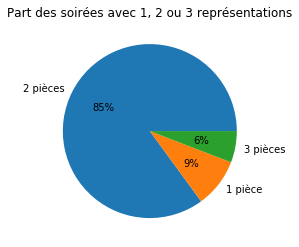

In [12]:
## Ici, on représente la proportion des soirées qui présentaient 2 pièces, 3 pièces ou 1 pièce. 

Nb_pièces  = CF_saison['performance_date'].value_counts().to_frame().reset_index()  # Compte le nombre de dates similaires 
Nb_pièces.columns = ['performance_date', 'Nombre de pièces']

Nb_pièces  = Nb_pièces['Nombre de pièces'].value_counts().to_frame().reset_index()  
# Compte le nombre de soirées avec 1,2,3 pièces présentées

# Pie Chart
y = Nb_pièces['Nombre de pièces']
mylabels = ["2 pièces", "1 pièce", "3 pièces"]

fig, ax = plt.subplots()
ax.pie(y, labels = mylabels, autopct='%.0f%%')
ax.set_title('Part des soirées avec 1, 2 ou 3 représentations')
plt.show()


# Soirée type à la C-F en 1733-1734

### 1. Longueur des pièces

     counts  percentage
5.0     220   40.816327
1.0     185   34.322820
3.0     130   24.118738
2.0       4    0.742115


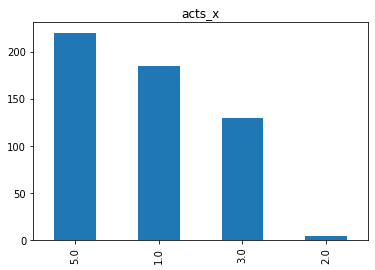

In [13]:
# Etude des occurrences du nombre d'actes :
# On remarque que l'écart-type de 1,7 est très grand 
# On remarque une occurence presque égale, et surtout très importante des extrêmes : pièces en 1 acte et pièces en 5 actes
# Ainsi, l'on peut supposer que conformément à la tradition en vigueur au XVIIIe sièce, une soirée à la C-F se déroulait avec 
# pièce longue (3 ou 5 actes), suivie par une pièce courte (1 ou 2 actes). 

g = CF_saison['acts_x']
Freq_Genre = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Genre)

CF_saison['acts_x'].value_counts().plot(kind='bar', title='acts_x')

In [14]:
nb_actes_2 = CF_saison[(CF_saison['acts_x']==2)]

nb_actes_2

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers
53189,La Motte (Antoine Houdar de),Magnifique (Le),comédie,1733-08-17,1731-05-11,2.0,,True,False,prose
53190,La Motte (Antoine Houdar de),Magnifique (Le),comédie,1733-10-05,1731-05-11,2.0,,True,False,prose
53191,La Motte (Antoine Houdar de),Magnifique (Le),comédie,1734-03-09,1731-05-11,2.0,,True,False,prose
53192,La Motte (Antoine Houdar de),Magnifique (Le),comédie,1734-04-09,1731-05-11,2.0,,True,False,prose


### 2. Présence de musique, danse ou machines ?

In [14]:
g = CF_saison['musique_danse_machine']
Freq_Musique = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Musique)


       counts  percentage
False     387   71.799629
True      152   28.200371


### 3. Nature de la pièce

                      counts  percentage
vers                     339   62.894249
prose                    168   31.168831
vers et vers libres       10    1.855288
prose/vers                 9    1.669759
vers libres                7    1.298701
prose et vers libres       6    1.113173


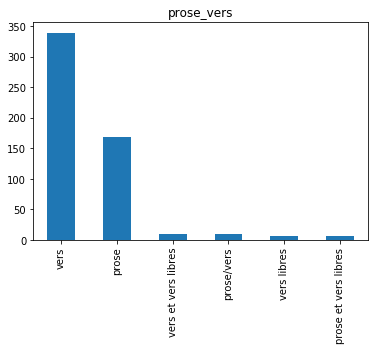

In [15]:
g = CF_saison['prose_vers']
Freq_Nature = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Nature)

CF_saison['prose_vers'].value_counts().plot(kind='bar', title='prose_vers')

### 4.Genre de la pièce

                          counts  percentage
comédie                      419   77.736549
tragédie                      97   17.996289
comédie héroïque               8    1.484230
comédie-ballet                 7    1.298701
tragi-comédie / tragédie       4    0.742115
tragi-comédie                  3    0.556586
intermède                      1    0.185529


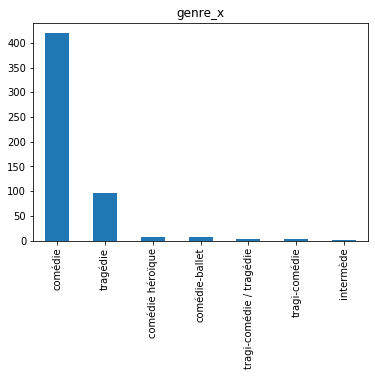

In [16]:
g = CF_saison['genre_x']
Freq_Genre = pd.concat([g.value_counts(),              
g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage'))

print (Freq_Genre)

CF_saison['genre_x'].value_counts().plot(kind='bar', title='genre_x')

In [16]:
### Ménage pour une data viz plus épurée 

test =  CF_saison.loc[CF_saison['prose_vers'].isin(['prose', 'vers'])]

test =  test.loc[test['genre_x'].isin(['comédie', 'tragédie'])]

test =  test.loc[test['acts_x'].isin([1.0, 3.0, 5.0])]

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 407 to 54659
Data columns (total 10 columns):
author_x                  480 non-null object
title                     480 non-null object
genre_x                   480 non-null object
performance_date          480 non-null object
first_performance_date    359 non-null object
acts_x                    480 non-null float64
alternative_title         370 non-null object
musique_danse_machine     480 non-null bool
prologue                  480 non-null bool
prose_vers                480 non-null object
dtypes: bool(2), float64(1), object(7)
memory usage: 34.7+ KB


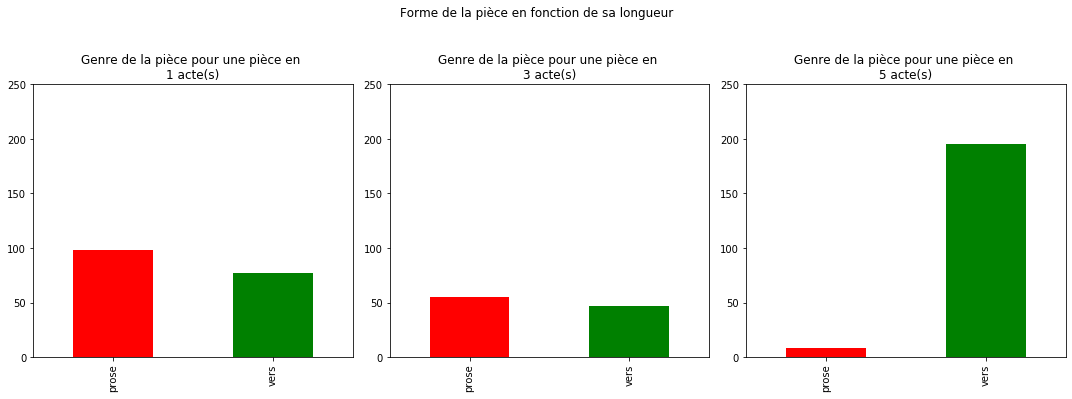

In [63]:
## En fonction du nombre d'acte de la pièce

actes=[1.0, 3.0, 5.0]

plt.figure(1,figsize = (20, 20))
plt.suptitle('Forme de la pièce en fonction de sa longueur', y=1.1)

for i in range(0,3) :
    table = test[(test['acts_x'] == actes[i])]
    x = table['prose_vers'].value_counts()
    plt.xticks([0,1],['prose','vers'])
    plt.tight_layout()
    plt.subplot(1,3,i+1)
    plt.title('Genre de la pièce pour une pièce en \n' +  str(int(actes[i]))  + ' acte(s)')
    plt.ylim(ymax=250)
    x.sort_index(axis=0).plot(kind='bar', figsize=(15, 5), color=['red', 'green'])


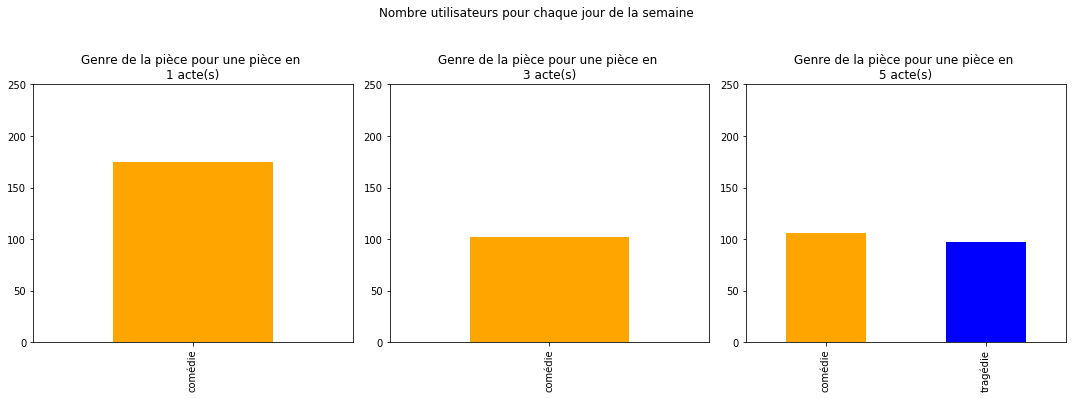

In [27]:
## En fonction du nombre d'acte de la pièce

actes=[1.0, 3.0, 5.0]

plt.figure(1,figsize = (20, 20))
plt.suptitle('Genre de la pièce en fonction de sa longueur', y=1.1)

for i in range(0,3) :
    plt.tight_layout()
    plt.subplot(1,3,i+1)
    plt.title('Genre de la pièce pour une pièce en \n' +  str(int(actes[i]))  + ' acte(s)')
    plt.ylim(ymax=250)
    test[(test['acts_x'] == actes[i])]['genre_x'].value_counts().plot(kind='bar', figsize=(15, 5), color=['orange', 'blue'])


In [73]:
## Ici, on représente la proportion des soirées qui présentaient 2 pièces, 3 pièces ou 1 pièce. 

table_comédie = CF_saison[(CF_saison['genre_x']== 'comédie')]

Part_actes  = table_comédie['acts_x'].value_counts().to_frame().reset_index()  # Compte le nombre de dates similaires 
Part_actes.columns = ['actes', 'Nombre occurences']

Part_actes

,actes,Nombre occurences
0,1.0,184
1,3.0,123
2,5.0,108
3,2.0,4


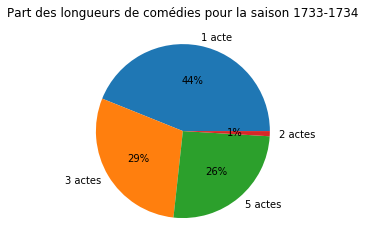

In [75]:
# Pie Chart
y = Part_actes['Nombre occurences']
mylabels = ["1 acte", "3 actes", "5 actes", "2 actes"]

fig, ax = plt.subplots()
ax.pie(y, labels = mylabels, autopct='%.0f%%')
ax.set_title('Part des longueurs de comédies pour la saison 1733-1734')
plt.show()


# VOIR EVOLUTION PAR RAPPORT A FIGURE PAGE 19 DU CHAPPITRE 2???!!!!!


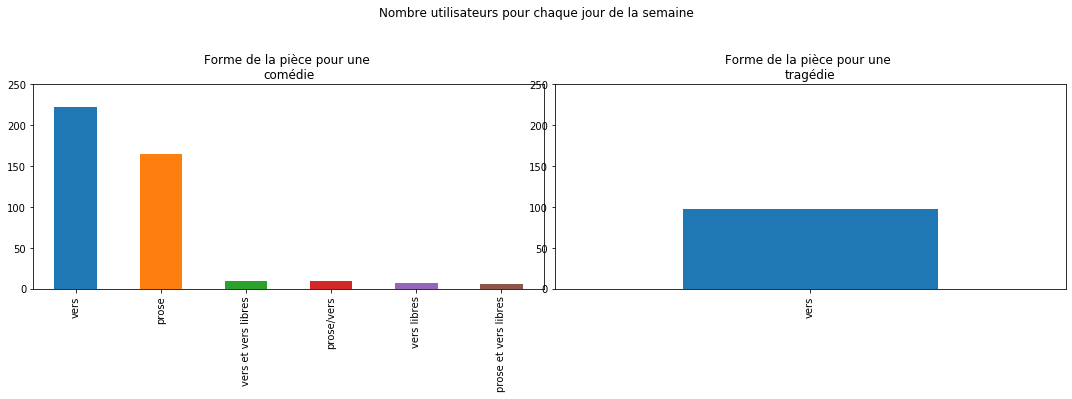

In [26]:
## En fonction du nombre d'acte de la pièce

genre=['comédie', 'tragédie']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b']


plt.figure(1,figsize = (20, 20))
plt.suptitle('Forme de la pièce en fonction de son genre', y=1.1)

for i in range(0,2) :
    plt.tight_layout()
    plt.subplot(1,2,i+1)
    plt.title('Forme de la pièce pour une \n' +  str((genre[i])))
    plt.ylim(ymax=250)
    CF_saison[(CF_saison['genre_x'] == genre[i])]['prose_vers'].value_counts().plot(kind='bar', figsize=(15, 5), color=colors)


In [109]:
long_nat_genre = pd.crosstab(index=test["acts_x"], 
                             columns=[test["prose_vers"],
                                      test["genre_x"]],
                             margins=True)   # Include row and column totals

long_nat_genre

prose_vers   prose    vers           All
genre_x    comédie comédie tragédie     
acts_x                                  
1.0             98      85        0  183
3.0             55      47        0  102
5.0              8      98      116  222
All            161     230      116  507

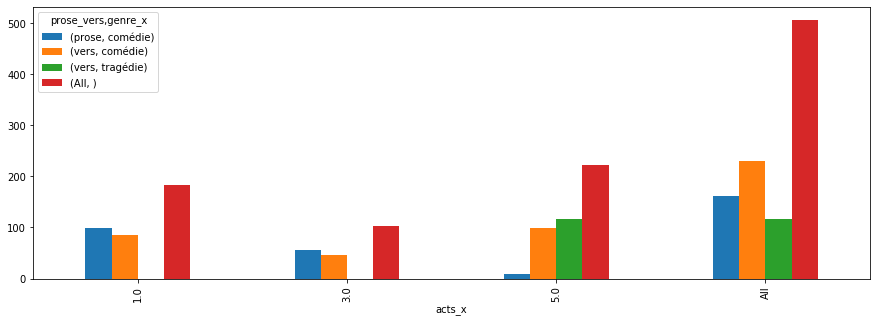

In [182]:
long_nat_genre.plot(kind='bar', figsize=(15, 5))

# Corpus, canons, auteurs ...

### 1. Les pièces les plus jouées 

In [8]:
Freq_title  = CF_saison['title'].value_counts().to_frame().reset_index()
Freq_title.columns = ['title', 'Fréquence de la pièce']


In [9]:
### Merge des fréq de représentations avec table principale 

CF_saison.sort_values(by=['title'])
Freq_title.sort_values(by=['title'])

CF_saison_2 = CF_saison.merge(Freq_title, how='inner', on="title",)
CF_saison_2 = CF_saison_2.sort_values(by=['Fréquence de la pièce'],ascending=False)


In [10]:
# Les 10 pièces qui sont les plus jouées pendant la saison

CF_saison_2.drop_duplicates(subset=['title'], inplace=True)
CF_saison_2 = pd.DataFrame(CF_saison_2)  
CF_saison_2_10 = CF_saison_2.head(10)
CF_saison_2_10

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers,Fréquence de la pièce
218,Dancourt (Florent Carton dit),Tuteur amoureux (Le) ou Le Tuteur,comédie,1733-10-09,1695-07-13,1.0,,False,False,prose,19
496,La Chaussée (Pierre-Claude),Fausse antipathie (La),comédie,1734-03-28,1733-10-02,3.0,,False,True,vers,19
306,Dancourt (Florent Carton dit),Trois cousines (Les),comédie,1734-03-30,1700-10-18,3.0,,True,True,prose,17
466,Pellegrin (Simon-Joseph),Pélopée,tragédie,1733-07-27,1733-07-18,5.0,,False,False,vers,16
261,Regnard (Jean-François),Distrait (Le),comédie,1733-10-29,1697-12-02,5.0,,False,False,vers,12
245,Regnard (Jean-François),Joueur (Le),comédie,1733-08-03,1696-12-19,5.0,,False,False,vers,12
373,Legrand (Marc-Antoine),Famille extravagante (La),comédie,1733-05-31,1709-06-07,1.0,,True,False,vers,11
514,Voltaire (François-Marie Arouet dit),Adélaïde du Guesclin,tragédie,1734-01-18,1734-01-18,5.0,,False,False,vers,11
453,Fagan (Barthélemy-Christophe),Rendez-vous ou l'Amour supposé (Le),comédie,1733-06-01,1733-05-27,1.0,,False,False,vers,11
508,Poisson (Philippe),Impromptu de campagne (L'),comédie,1734-01-04,1733-12-21,1.0,,False,False,vers,10


In [11]:
# On crée une variable booléenne "Nouvelle Pièce" qui vaut 1 si la pièce a été crée en 1733 ou 1734, 0 sinon. 

CF_saison_2_10['performance_date'] = pd.to_datetime(CF_saison_2_10['performance_date'])
CF_saison_2_10['first_performance_date'] = pd.to_datetime(CF_saison_2_10['first_performance_date'])

CF_saison_2_10['year_perf'], CF_saison_2_10['year_first'] = CF_saison_2_10['performance_date'].dt.year, CF_saison_2_10['first_performance_date'].dt.year

CF_saison_2_10['Nouvelle Pièece'] = CF_saison_2_10['year_first'].isin(['1733','1734'])
CF_saison_2_10

C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\menth\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,author_x,title,genre_x,performance_date,first_performance_date,acts_x,alternative_title,musique_danse_machine,prologue,prose_vers,Fréquence de la pièce,year_perf,year_first,Nouvelle Pièece
218,Dancourt (Florent Carton dit),Tuteur amoureux (Le) ou Le Tuteur,comédie,1733-10-09,1695-07-13,1.0,,False,False,prose,19,1733,1695,False
496,La Chaussée (Pierre-Claude),Fausse antipathie (La),comédie,1734-03-28,1733-10-02,3.0,,False,True,vers,19,1734,1733,True
306,Dancourt (Florent Carton dit),Trois cousines (Les),comédie,1734-03-30,1700-10-18,3.0,,True,True,prose,17,1734,1700,False
466,Pellegrin (Simon-Joseph),Pélopée,tragédie,1733-07-27,1733-07-18,5.0,,False,False,vers,16,1733,1733,True
261,Regnard (Jean-François),Distrait (Le),comédie,1733-10-29,1697-12-02,5.0,,False,False,vers,12,1733,1697,False
245,Regnard (Jean-François),Joueur (Le),comédie,1733-08-03,1696-12-19,5.0,,False,False,vers,12,1733,1696,False
373,Legrand (Marc-Antoine),Famille extravagante (La),comédie,1733-05-31,1709-06-07,1.0,,True,False,vers,11,1733,1709,False
514,Voltaire (François-Marie Arouet dit),Adélaïde du Guesclin,tragédie,1734-01-18,1734-01-18,5.0,,False,False,vers,11,1734,1734,True
453,Fagan (Barthélemy-Christophe),Rendez-vous ou l'Amour supposé (Le),comédie,1733-06-01,1733-05-27,1.0,,False,False,vers,11,1733,1733,True
508,Poisson (Philippe),Impromptu de campagne (L'),comédie,1734-01-04,1733-12-21,1.0,,False,False,vers,10,1734,1733,True


In [168]:
# Stats sur les 10 pièces les plus jouées... 

print( CF_saison_2_10['author_x'].value_counts(),  '\n'*5, 
      CF_saison_2_10['genre_x'].value_counts(),  '\n'*5,
        CF_saison_2_10['acts_x'].value_counts(),   '\n'*5,
        CF_saison_2_10['prose_vers'].value_counts(), '\n'*5,
       CF_saison_2_10['Nouvelle Pièece'].value_counts() )

Dancourt (Florent Carton dit)           2
Regnard (Jean-François)                 2
Du Fresny (Charles)                     1
Pellegrin (Simon-Joseph)                1
Voltaire (François-Marie Arouet dit)    1
Fagan (Barthélemy-Christophe)           1
La Chaussée (Pierre-Claude)             1
Legrand (Marc-Antoine)                  1
Name: author_x, dtype: int64 




 comédie     8
tragédie    2
Name: genre_x, dtype: int64 




 1.0    4
5.0    4
3.0    2
Name: acts_x, dtype: int64 




 vers     8
prose    2
Name: prose_vers, dtype: int64 




 False    7
True     3
Name: Nouvelle Pièece, dtype: int64


## 2. Les auteurs les plus joués

In [16]:
## Les auteurs se partagent entre les canons du théâtre classique (Molière, Corneille, Racine)
## et les auteurs plus contemporains (Voltaire, Dancourt, Regnard, La Chaussée...)

Freq_author  = CF_saison['author_x'].value_counts().to_frame().reset_index()
Freq_author.columns = ['author_x', 'Nombre de représentations']

Freq_author.head(10)

# Dancourt 1661 - 1725 (vaudeville moderne)
# Molière 1622-1673
# Regnard 1655-1709
# Voltaire 1694-1778
# Du Fresny 1648-1724
# Corneille 1606-1684
# Racine 1639-1699
# La Chaussée 1692-1754 (comédie larmoyante)
# Legrand 1673-1728
# Boursault 1638-1701

,author_x,Nombre de représentations
0,Dancourt (Florent Carton dit),73
1,Molière (Jean-Baptiste Poquelin dit),54
2,Regnard (Jean-François),51
3,Racine (Jean),26
4,Corneille (Pierre),26
5,Du Fresny (Charles),24
6,Voltaire (François-Marie Arouet dit),20
7,Legrand (Marc-Antoine),19
8,La Chaussée (Pierre-Claude),19
9,Boursault (Edme),16


In [15]:
### Ils sont les plus joués, mais est-ce dû au nombre de pièces à leur actif, ou au succès d'une pièce ?

Freq_author_prod  = CF_saison_2['author_x'].value_counts().to_frame().reset_index()
Freq_author_prod.columns = ['author_x', 'Nombre de pièces jouées']
Freq_author_prod.head(10)

,author_x,Nombre de pièces jouées
0,Molière (Jean-Baptiste Poquelin dit),15
1,Dancourt (Florent Carton dit),11
2,Regnard (Jean-François),8
3,Racine (Jean),7
4,Corneille (Pierre),6
5,Voltaire (François-Marie Arouet dit),4
6,Du Fresny (Charles),4
7,Montfleury (Antoine Jacob dit),4
8,Legrand (Marc-Antoine),3
9,Campistron (Jean Galbert de),3


In [17]:
Freq_author_prod.sort_values(by=['author_x'])
Freq_author.sort_values(by=['author_x'])

Freq = Freq_author_prod.merge(Freq_author, how='inner', on="author_x",)
Freq['Moyenne de représentation par pièce'] = Freq['Nombre de représentations']/Freq['Nombre de pièces jouées']
Freq = Freq.sort_values(by=['Nombre de représentations'],ascending=False)
Freq.head(15)

,author_x,Nombre de pièces jouées,Nombre de représentations,Moyenne de représentation par pièce
1,Dancourt (Florent Carton dit),11,73,6.636364
0,Molière (Jean-Baptiste Poquelin dit),15,54,3.600000
2,Regnard (Jean-François),8,51,6.375000
3,Racine (Jean),7,26,3.714286
4,Corneille (Pierre),6,26,4.333333
6,Du Fresny (Charles),4,24,6.000000
5,Voltaire (François-Marie Arouet dit),4,20,5.000000
29,La Chaussée (Pierre-Claude),1,19,19.000000
8,Legrand (Marc-Antoine),3,19,6.333333
33,Pellegrin (Simon-Joseph),1,16,16.000000


In [21]:
Freq.sort_values(by=['Moyenne de représentation par pièce'], ascending=False).head(10)


,author_x,Nombre de pièces jouées,Nombre de représentations,Moyenne de représentation par pièce
29,La Chaussée (Pierre-Claude),1,19,19.000000
33,Pellegrin (Simon-Joseph),1,16,16.000000
21,Poisson (Philippe),1,10,10.000000
17,La Chaussée (Pierre-Claude Nivelle de La Chaus...,1,9,9.000000
31,Brueys (David-Augustin de),1,9,9.000000
16,Fagan (Barthélemy-Christophe),2,16,8.000000
24,Aigueberre (Jean Dumas d'),1,8,8.000000
11,Boursault (Edme),2,16,8.000000
27,La Fontaine (Jean de) ; Champmeslé (Charles Ch...,1,7,7.000000
36,La Fontaine (Jean de),1,7,7.000000


## Nombre de représentations par saison pour Voltaire, Molière, Corneille, Racine, Dancourt et La Chaussée

In [2]:
nb_representations_jour = pd.read_csv (r'C:\Users\menth\Downloads\performances_days.csv')

In [3]:
nb_representations_jour['Debut saison']=nb_representations_jour['season'].str[0:4]
nb_representations_jour = nb_representations_jour[nb_representations_jour['Debut saison'].between('1700', '1740')]

In [7]:
test=nb_representations_jour.pivot(index='season', columns='author_n', values='performances_days')

In [8]:
test = test.rename_axis(None)
test.reset_index(level=0, inplace=True)
test['Debut Saison']=test['index'].str[0:4]
test

author_n,index,Corneille (Pierre),Dancourt (Florent Carton dit),La Chaussée (Pierre-Claude),Molière (Jean-Baptiste Poquelin dit),Racine (Jean),Voltaire (François-Marie Arouet dit),Debut Saison
0,1700-1701,37.0,83.0,NaN,120.0,37.0,NaN,1700
1,1701-1702,42.0,78.0,NaN,118.0,44.0,NaN,1701
2,1702-1703,22.0,67.0,NaN,133.0,38.0,NaN,1702
3,1703-1704,23.0,34.0,NaN,158.0,33.0,NaN,1703
4,1704-1705,24.0,78.0,NaN,150.0,41.0,NaN,1704
5,1705-1706,32.0,46.0,NaN,136.0,31.0,NaN,1705
6,1706-1707,34.0,32.0,NaN,141.0,32.0,NaN,1706
7,1707-1708,43.0,64.0,NaN,97.0,38.0,NaN,1707
8,1708-1709,35.0,49.0,NaN,107.0,40.0,NaN,1708
9,1709-1710,45.0,64.0,NaN,130.0,41.0,NaN,1709


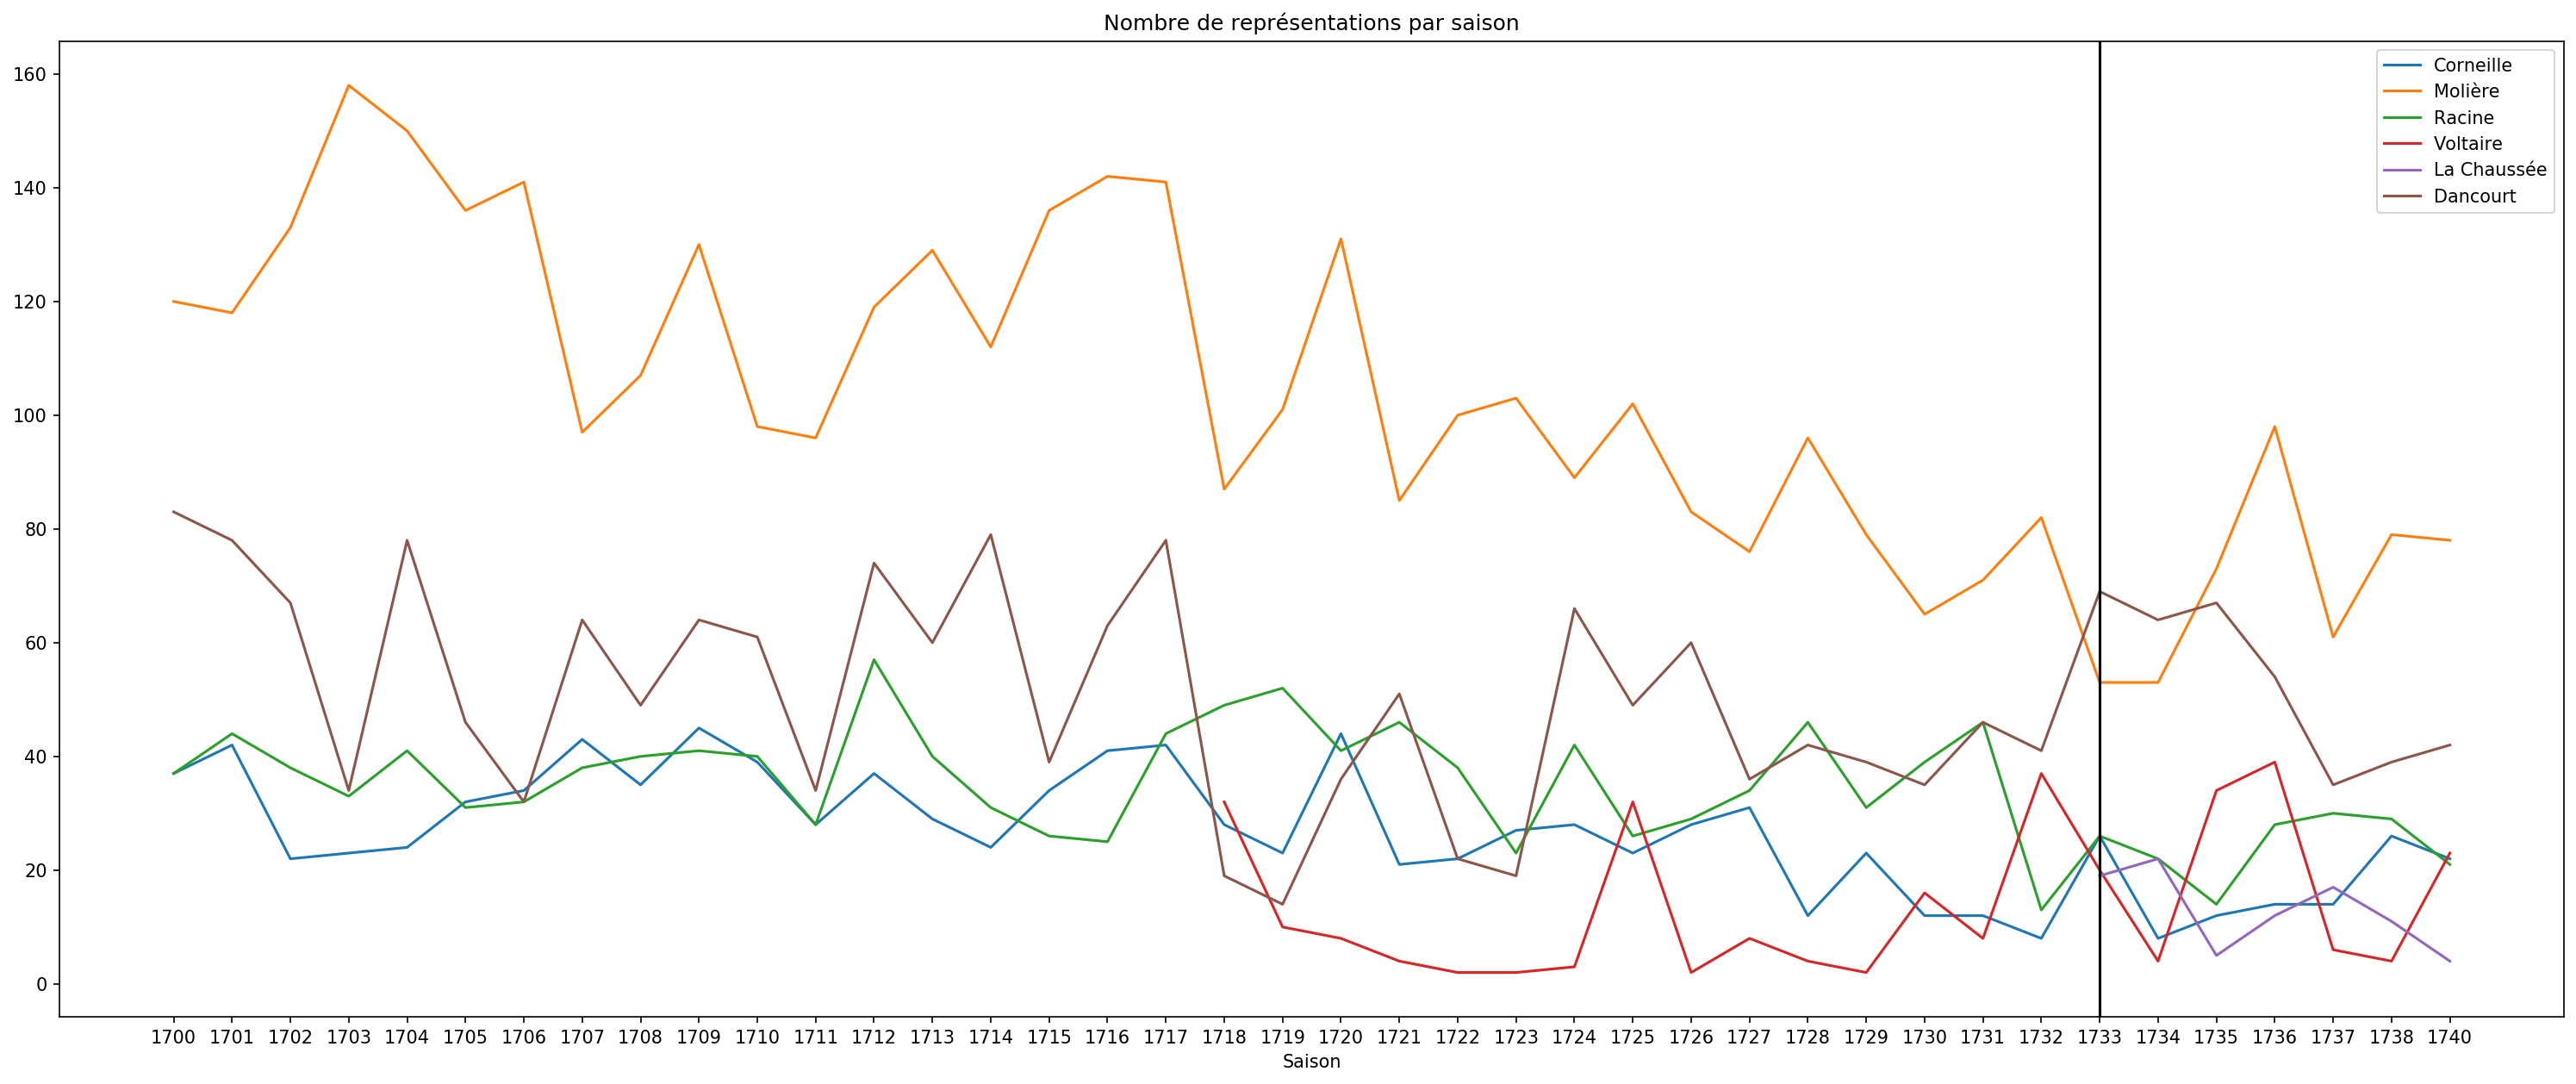

In [13]:

# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(25, 10), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
plt.plot(test['Debut Saison'],test['Corneille (Pierre)'],label='Corneille')
plt.plot(test['Debut Saison'],test['Molière (Jean-Baptiste Poquelin dit)'],label='Molière')
plt.plot(test['Debut Saison'],test['Racine (Jean)'], label='Racine')
plt.plot(test['Debut Saison'],test['Voltaire (François-Marie Arouet dit)'],label='Voltaire')
plt.plot(test['Debut Saison'],test['La Chaussée (Pierre-Claude)'], label='La Chaussée')
plt.plot(test['Debut Saison'],test['Dancourt (Florent Carton dit)'], label='Dancourt')

# adding title to the plot
plt.title('Nombre de représentations par saison')
  
# adding Label to the x-axis
plt.xlabel('Saison')

plt.axvline(x="1733", color="black")

  
# adding legend to the curve
plt.legend()



#  III. Les recettes

In [32]:
Recettes_moy= pd.read_csv (r'C:\Users\menth\Downloads\mean_receipts_day.csv')

In [33]:
Recettes_moy['Debut saison']=Recettes_moy['season'].str[0:4]
Recettes_moy = Recettes_moy[Recettes_moy['Debut saison'].between('1700', '1740')]

In [36]:
Recettes_moy=Recettes_moy.pivot(index='season', columns='author_n', values='mean_receipts_day')

In [37]:
Recettes_moy = Recettes_moy.rename_axis(None)
Recettes_moy.reset_index(level=0, inplace=True)
Recettes_moy['Debut Saison']=Recettes_moy['index'].str[0:4]
Recettes_moy.head(10)

author_n,index,Corneille (Pierre),Dancourt (Florent Carton dit),Fagan (Barthélemy-Christophe),La Chaussée (Pierre-Claude),Molière (Jean-Baptiste Poquelin dit),Pellegrin (Simon-Joseph),Racine (Jean),Voltaire (François-Marie Arouet dit),Debut Saison
0,1700-1701,824.412500,818.078313,NaN,NaN,712.115625,NaN,838.235811,NaN,1700
1,1701-1702,556.868155,754.469712,NaN,NaN,557.819597,NaN,731.532386,NaN,1701
2,1702-1703,756.381818,564.829851,NaN,NaN,658.816541,NaN,541.306579,NaN,1702
3,1703-1704,563.634783,490.482353,NaN,NaN,692.591456,NaN,466.601515,NaN,1703
4,1704-1705,747.156250,580.550641,NaN,NaN,542.532667,NaN,423.529268,NaN,1704
5,1705-1706,646.517969,564.667391,NaN,NaN,549.580699,986.673333,490.822581,NaN,1705
6,1706-1707,723.263235,650.184375,NaN,NaN,631.759574,1000.554545,697.115625,NaN,1706
7,1707-1708,768.233721,756.181250,NaN,NaN,552.174227,NaN,829.686842,NaN,1707
8,1708-1709,642.115714,763.539796,NaN,NaN,594.899533,NaN,526.436250,NaN,1708
9,1709-1710,483.156667,425.760547,NaN,NaN,386.981923,NaN,537.212195,NaN,1709


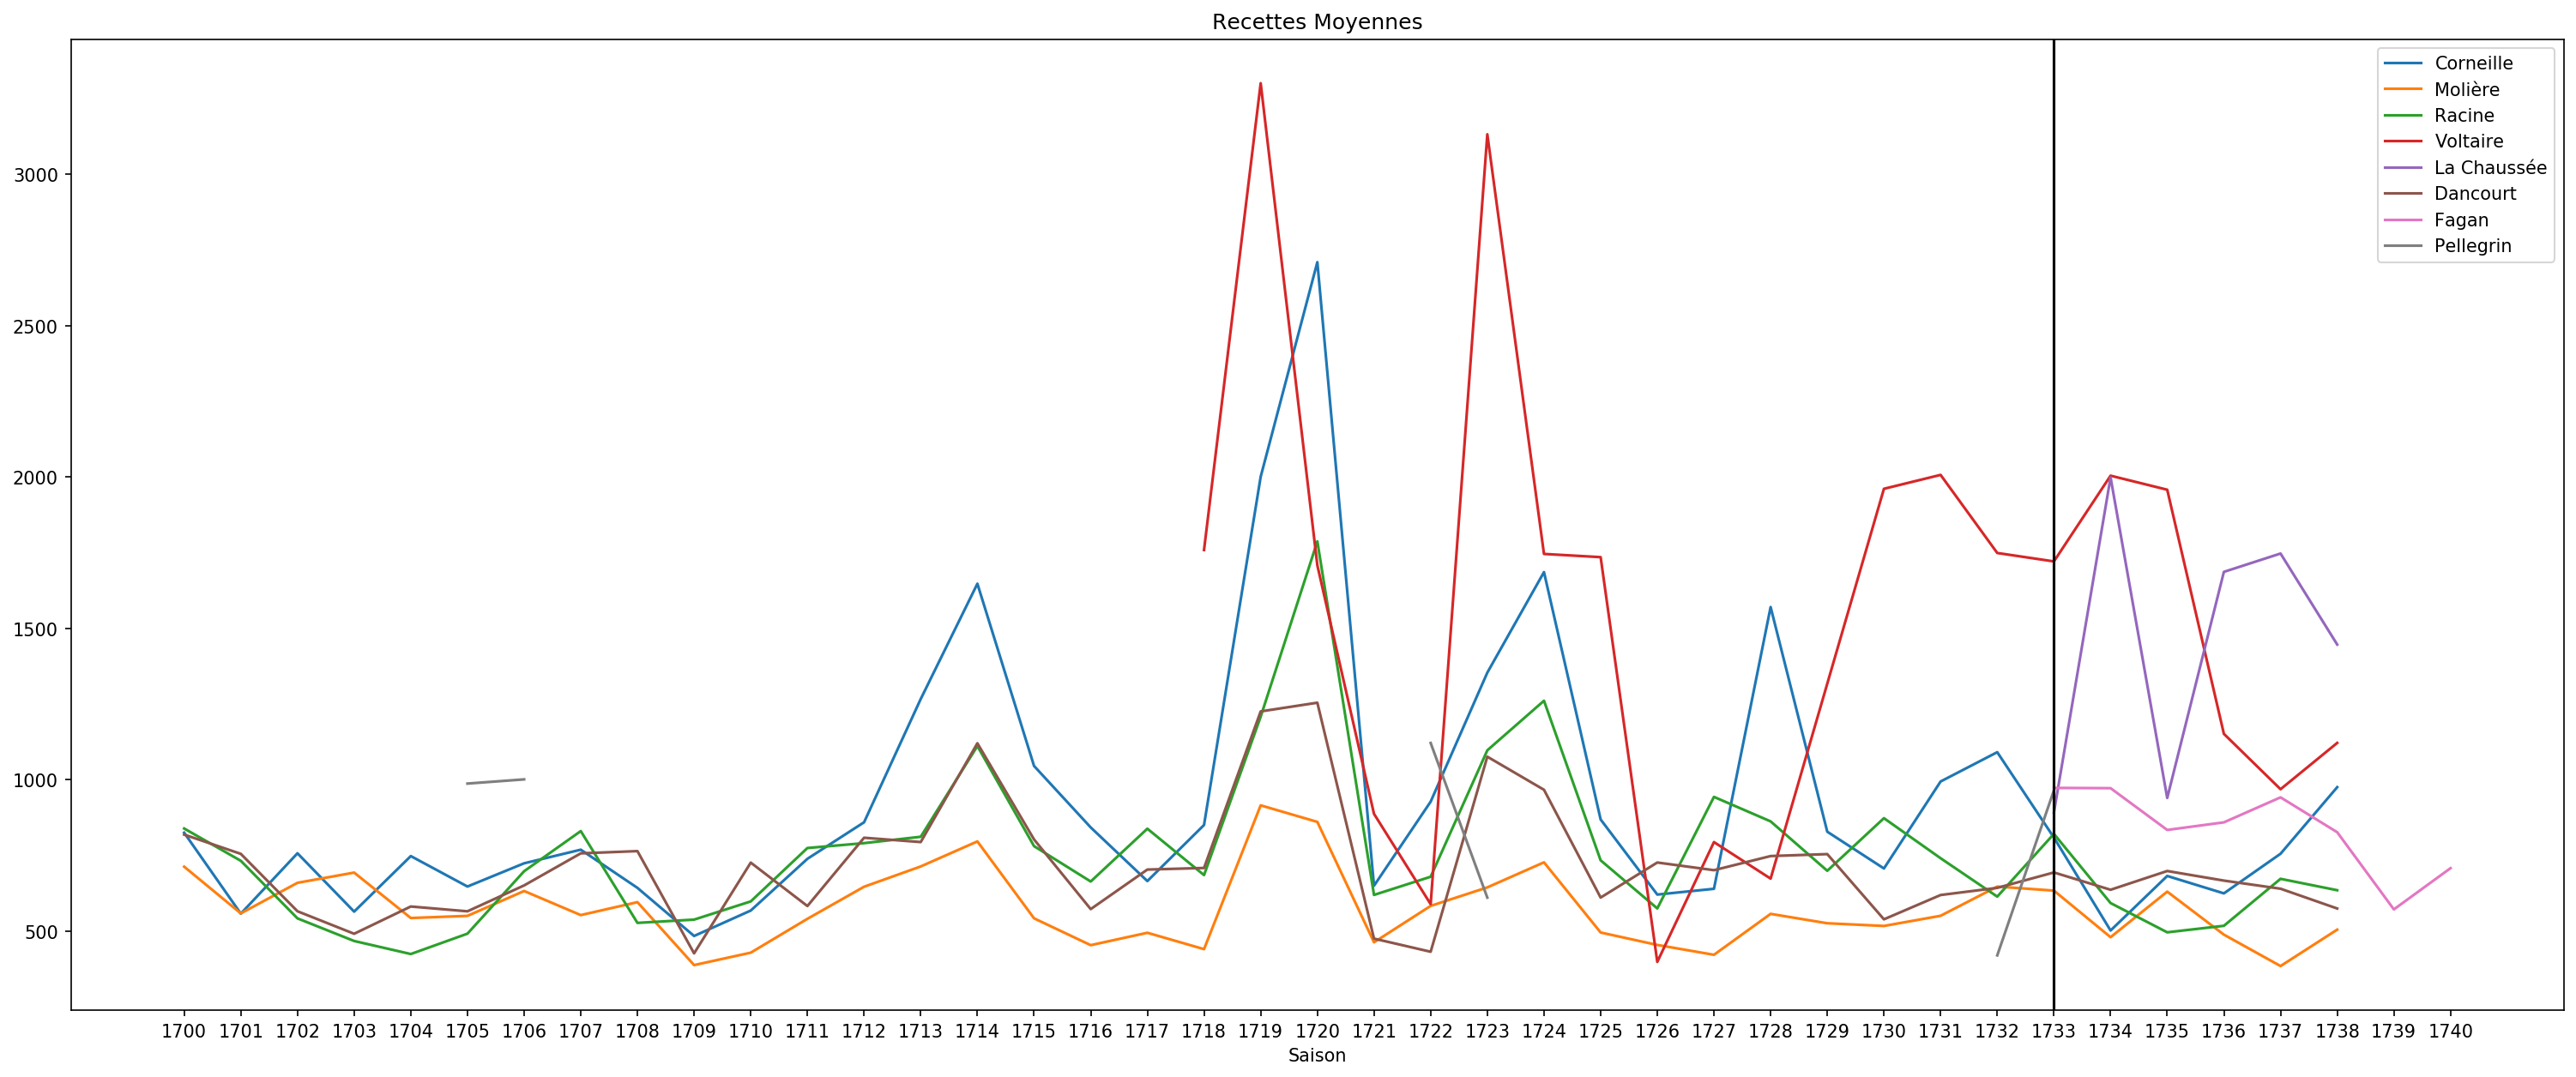

In [39]:

# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(25, 10), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
plt.plot(Recettes_moy['Debut Saison'],Recettes_moy['Corneille (Pierre)'],label='Corneille')
plt.plot(Recettes_moy['Debut Saison'],Recettes_moy['Molière (Jean-Baptiste Poquelin dit)'],label='Molière')
plt.plot(Recettes_moy['Debut Saison'],Recettes_moy['Racine (Jean)'], label='Racine')
plt.plot(Recettes_moy['Debut Saison'],Recettes_moy['Voltaire (François-Marie Arouet dit)'],label='Voltaire')
plt.plot(Recettes_moy['Debut Saison'],Recettes_moy['La Chaussée (Pierre-Claude)'], label='La Chaussée')
plt.plot(Recettes_moy['Debut Saison'],Recettes_moy['Dancourt (Florent Carton dit)'], label='Dancourt')
plt.plot(Recettes_moy['Debut Saison'],Recettes_moy['Fagan (Barthélemy-Christophe)'], label='Fagan')
plt.plot(Recettes_moy['Debut Saison'],Recettes_moy['Pellegrin (Simon-Joseph)'], label='Pellegrin')

# adding title to the plot
plt.title('Recettes Moyennes')
  
# adding Label to the x-axis
plt.xlabel('Saison')

plt.axvline(x="1733", color="black")

  
# adding legend to the curve
plt.legend()

